In [1]:
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='whitegrid')

In [2]:
quandl.ApiConfig.api_key = 'tJKSQn1pHLbyo1mu1wYn'

ue_rate = quandl.get('FRED/UNRATE', start_date = '2000-12-01')
job_vacancies = quandl.get('FRED/JTSJOR', start_date = '2000-12-1')

In [3]:
df_rates = pd.concat([ue_rate, job_vacancies], join= 'outer', axis=1).dropna()
df_rates.columns = ['Unemployment Rate', 'Vacancy rate']
df_rates.head()

,Unemployment Rate,Vacancy rate
Date,,
2000-12-01,3.9,3.5
2001-01-01,4.2,3.9
2001-02-01,4.2,3.6
2001-03-01,4.3,3.4
2001-04-01,4.4,3.5


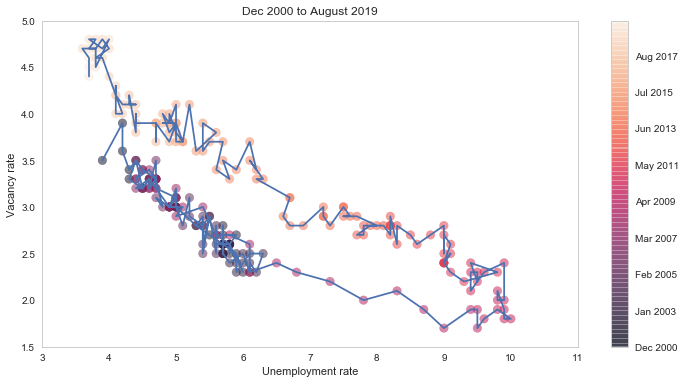

In [4]:
df_post_gr = df_rates[(df_rates.index>= '12-01-2000')]

c = np.arange(len(df_post_gr.index))

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,1,1)
c = np.arange(len(df_rates.index))
plt.scatter(df_post_gr['Unemployment Rate'].values, df_post_gr['Vacancy rate'].values, s=75, c=c,alpha=0.5)

cbar = plt.colorbar(ax = ax)
cbar.set_ticks([int(i) for i in cbar.get_ticks()])
cbar.set_ticklabels([df_post_gr.index[int(i)].strftime('%b %Y') for i in cbar.get_ticks()[:9]])

plt.plot(df_post_gr['Unemployment Rate'].values,df_post_gr['Vacancy rate'].values, '-')

ax.set_title(df_post_gr.index[0].strftime('%b %Y')+' to '+df_post_gr.index[-1].strftime('%B %Y'))
ax.set_xlim([3,11])
ax.set_ylim([1.5,5])
ax.set_xlabel('Unemployment rate')
ax.set_ylabel('Vacancy rate')
ax.grid()